# Customer Segmentation Reporting

**[1. Data Understanding (EDA)](#understanding)**

**[2. Reporting](#reporting)**

<a id="understanding"></a>
# 1. Data Understanding (EDA)

## Bonus(es):
- We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

- What makes the customers buy? Tell us which feature we should be focusing more on.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import pyplot as plt
from prettytable import PrettyTable

In [3]:
data = pd.read_csv("term-deposit-marketing-2020.csv")
df = data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


## duration

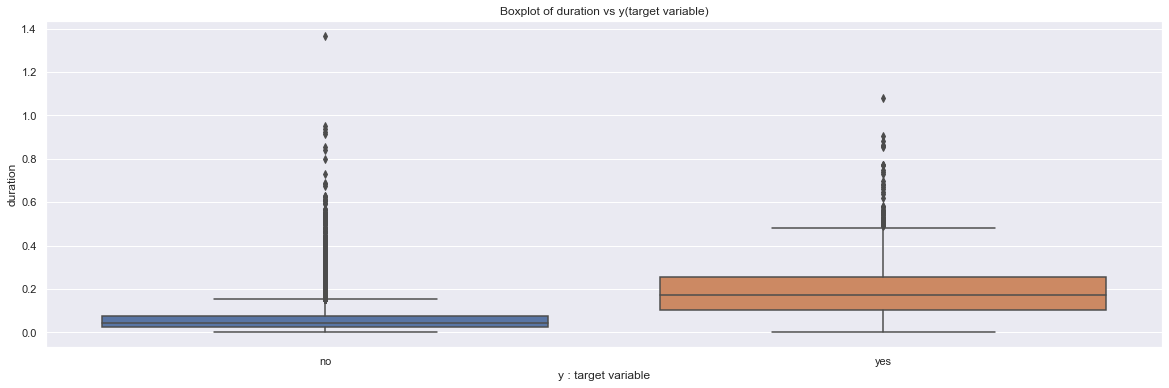

In [34]:
# çağrı süresini saniyeden dakikaya dönüştürme
data['duration'] = data['duration']/60
sns.boxplot( y = data['duration'], x = data['y'])
plt.title("Boxplot of duration vs y(target variable)")
plt.xlabel('y : target variable');

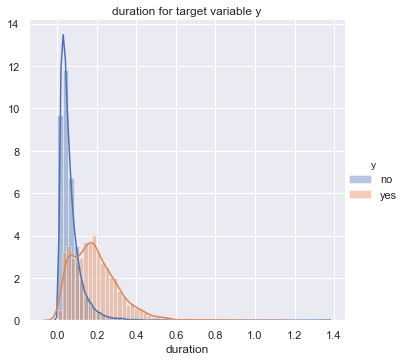

In [35]:
sns.FacetGrid(data, hue = 'y', height = 5) \
.map(sns.distplot, 'duration') \
.add_legend()
plt.title('duration for target variable y');

In [7]:
data.duration.describe()

count    40000.000000
mean         4.247072
std          4.322775
min          0.000000
25%          1.666667
50%          2.916667
75%          5.216667
max         81.966667
Name: duration, dtype: float64

In [10]:
for x in range(95, 101, 1):
    print("{}% of calls have duration less than equal to {}".format(x, data.duration.quantile(x/100)))
iqr = data.duration.quantile(0.75) - data.duration.quantile(0.25)
print('IQR {}'.format(iqr))

95% of calls have duration less than equal to 12.567499999999926
96% of calls have duration less than equal to 13.784000000000015
97% of calls have duration less than equal to 15.35
98% of calls have duration less than equal to 17.633666666666613
99% of calls have duration less than equal to 21.217000000000066
100% of calls have duration less than equal to 81.96666666666667
IQR 3.55


**Gözlem**:
- evet ve hayır hedef değişkeni için çeyrek süre aralıklarında net bir ayrım olduğu için öznitelik süresi önemli bir özellik gibi görünmektedir.

- Çağrı sürelerinin %75'i 5,22 veya daha azdır.

- duraiton ortalama 4.24 ve standart sapma 4,32'tir.

- duraiton açısından aykırı değerler vardır.

## age

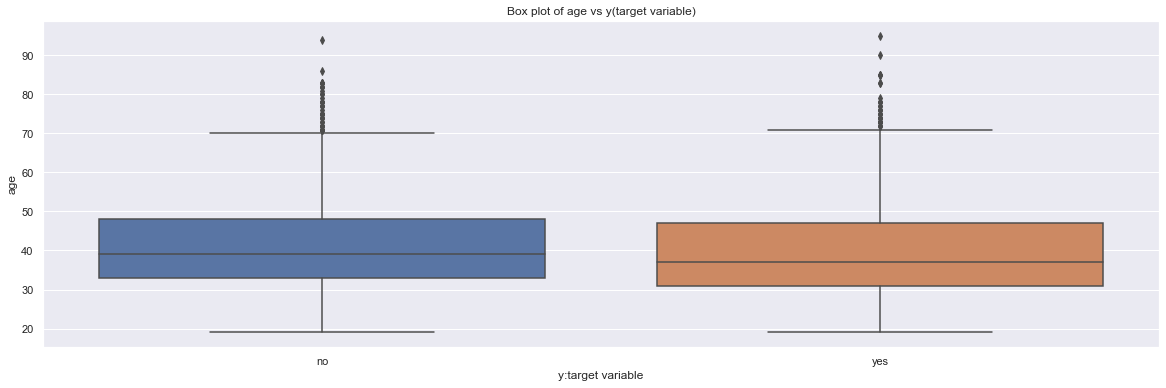

In [36]:
sns.boxplot(y=data['age'], x=data['y'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable');

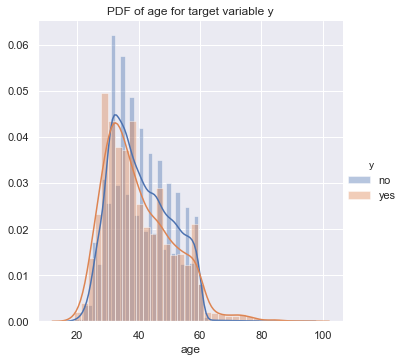

In [39]:
sns.FacetGrid(data, hue='y', height=5) \
.map(sns.distplot, 'age') \
.add_legend()
plt.title('PDF of age for target variable y');

In [13]:
data.age.describe()

count    40000.000000
mean        40.544600
std          9.641776
min         19.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [25]:
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, data.age.quantile(x/100)))
iqr = data.age.quantile(0.75) - data.age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than equal to 58.0
96% of people having age are less than equal to 58.0
97% of people having age are less than equal to 59.0
98% of people having age are less than equal to 59.0
99% of people having age are less than equal to 60.0
100% of people having age are less than equal to 95.0
IQR 15.0


In [26]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [27]:
count_age_response_pct = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()


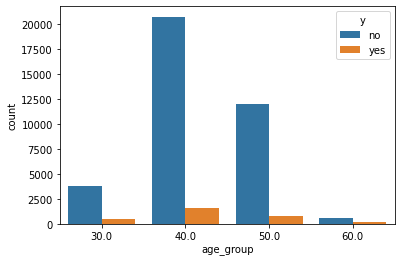

In [28]:
sns.countplot(x='age_group', data=data, hue='y');

In [29]:
print('Success rate and total clients contacted for different age_groups:')
print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 30]), data[data['age_group'] == 30].y.value_counts()[1]/len(data[data['age_group'] == 30])))
print('Clients of age 30-45 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 40]), data[data['age_group'] == 40].y.value_counts()[1]/len(data[data['age_group'] == 40])))
print('Clients of age 40-60 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 50]), data[data['age_group'] == 50].y.value_counts()[1]/len(data[data['age_group'] == 50])))
print('Clients of 60+ age contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 60]), data[data['age_group'] == 60].y.value_counts()[1]/len(data[data['age_group'] == 60])))

Success rate and total clients contacted for different age_groups:
Clients age < 30 contacted: 4274, Success rate: 0.10879737950397754
Clients of age 30-45 contacted: 22248, Success rate: 0.06912980942107155
Clients of age 40-60 contacted: 12751, Success rate: 0.059760018822053174
Clients of 60+ age contacted: 727, Success rate: 0.18019257221458046


**Gözlem**:
- Yaşı 30'dan küçük ve 60'tan büyük olanlar diğerlerine göre daha yüksek başarı oranına sahiptir.

## job

In [30]:
data.job.value_counts()

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

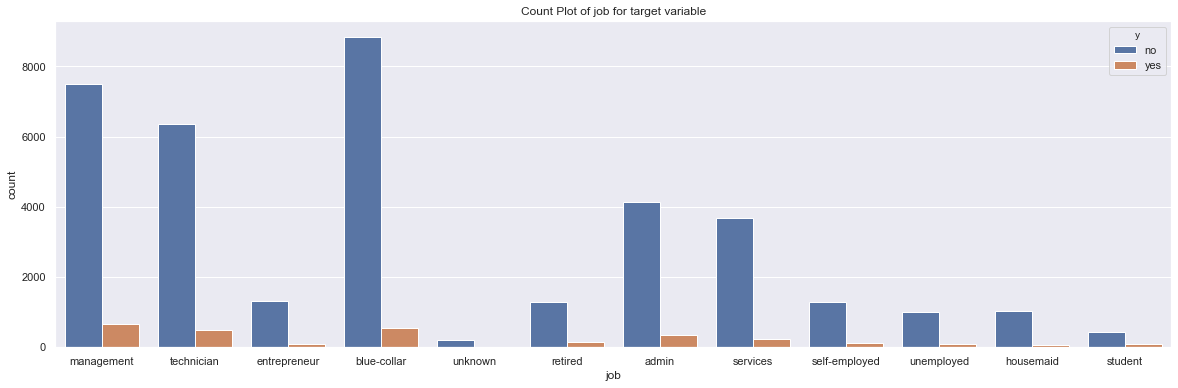

In [33]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=data['job'], data=data, hue=data['y'])
plt.title('Count Plot of job for target variable');

In [47]:
table = PrettyTable(['Job', 'Total Clients', 'Success rate'])
table.add_row(['Blue-collar', len(data[data['job'] == 'blue-collar']), data[data['job'] == 'blue-collar'].y.value_counts()[1]/len(data[data['job'] == 'blue-collar'])])
table.add_row(['Management', len(data[data['job'] == 'management']), data[data['job'] == 'management'].y.value_counts()[1]/len(data[data['job'] == 'management'])])
table.add_row(['Technician', len(data[data['job'] == 'technician']), data[data['job'] == 'technician'].y.value_counts()[1]/len(data[data['job'] == 'technician'])])
table.add_row(['Admin', len(data[data['job'] == 'admin']), data[data['job'] == 'admin'].y.value_counts()[1]/len(data[data['job'] == 'admin'])])
table.add_row(['Services', len(data[data['job'] == 'services']), data[data['job'] == 'services'].y.value_counts()[1]/len(data[data['job'] == 'services'])])
table.add_row(['Retired', len(data[data['job'] == 'retired']), data[data['job'] == 'retired'].y.value_counts()[1]/len(data[data['job'] == 'retired'])])
table.add_row(['Self-employed', len(data[data['job'] == 'self-employed']), data[data['job'] == 'self-employed'].y.value_counts()[1]/len(data[data['job'] == 'self-employed'])])
table.add_row(['Entrepreneur', len(data[data['job'] == 'entrepreneur']), data[data['job'] == 'entrepreneur'].y.value_counts()[1]/len(data[data['job'] == 'entrepreneur'])])
table.add_row(['Unemployed', len(data[data['job'] == 'unemployed']), data[data['job'] == 'unemployed'].y.value_counts()[1]/len(data[data['job'] == 'unemployed'])])
table.add_row(['Housemaid', len(data[data['job'] == 'housemaid']), data[data['job'] == 'housemaid'].y.value_counts()[1]/len(data[data['job'] == 'housemaid'])])
table.add_row(['Student', len(data[data['job'] == 'student']), data[data['job'] == 'student'].y.value_counts()[1]/len(data[data['job'] == 'student'])])
table.add_row(['Unknown', len(data[data['job'] == 'unknown']), data[data['job'] == 'unknown'].y.value_counts()[1]/len(data[data['job'] == 'unknown'])])
print(table)

+---------------+---------------+----------------------+
|      Job      | Total Clients |     Success rate     |
+---------------+---------------+----------------------+
|  Blue-collar  |      9383     | 0.057018011297026536 |
|   Management  |      8166     | 0.08278226794024002  |
|   Technician  |      6852     | 0.07253356684179801  |
|     Admin     |      4483     | 0.07829578407316529  |
|    Services   |      3910     | 0.06086956521739131  |
|    Retired    |      1437     | 0.10508002783576896  |
| Self-employed |      1414     | 0.07920792079207921  |
|  Entrepreneur |      1405     | 0.06263345195729537  |
|   Unemployed  |      1104     | 0.08695652173913043  |
|   Housemaid   |      1087     | 0.04875804967801288  |
|    Student    |      524      | 0.15648854961832062  |
|    Unknown    |      235      | 0.07234042553191489  |
+---------------+---------------+----------------------+


**Gözlem**:
- Ögrenciler en yüksek başarı oranına sahiptir. Emeklilerde diğerlerine göre başarı oranı yüksektir.
- Müşteri sayımız 'Blue-collar' , 'Management' ve 'Technician' daha fazladır.

## education

In [48]:
data.education.value_counts()

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

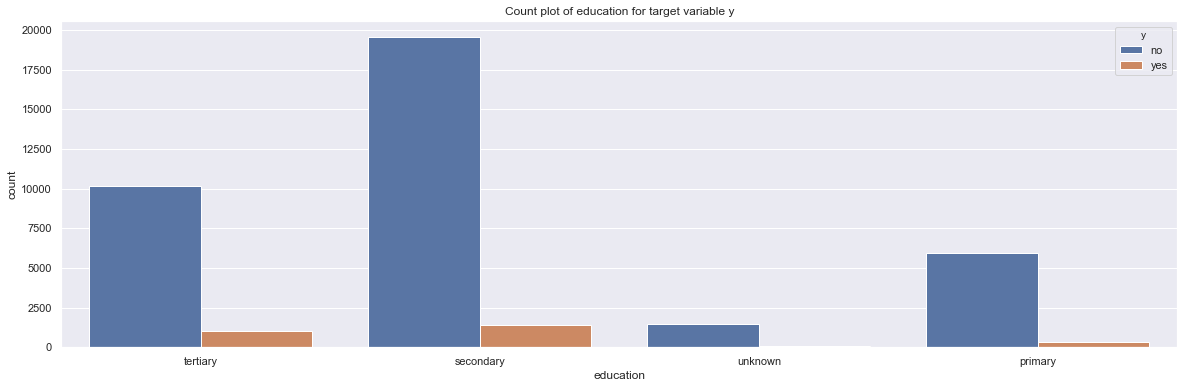

In [50]:
sns.countplot(x=data['education'], data=data, hue=data['y'])
plt.title('Count plot of education for target variable y');

**Gözlem**:
- Temasa geçen kişilerin çoğu üçüncü(tertiary) veya orta(secondary) öğretime sahiptir.

## default

In [51]:
data.default.value_counts()

no     39191
yes      809
Name: default, dtype: int64

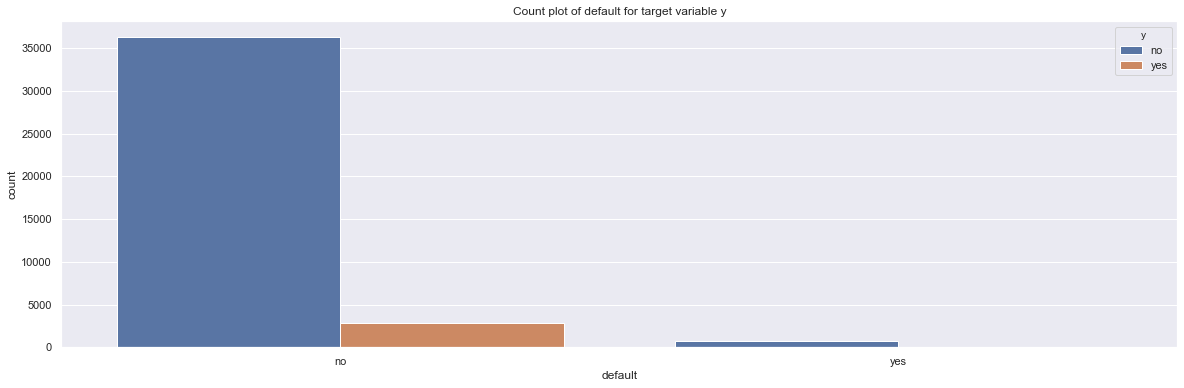

In [52]:
sns.countplot(x=data['default'], data=data, hue=data['y'])
plt.title('Count plot of default for target variable y');

In [53]:
data[data['default'] == 'yes'].y.count()

809

**Gözlem**:
- Temerrüde düşmüş olan çok az müşteriyle iletişime geçilmiştir.

## loan

In [54]:
data.loan.value_counts()

no     33070
yes     6930
Name: loan, dtype: int64

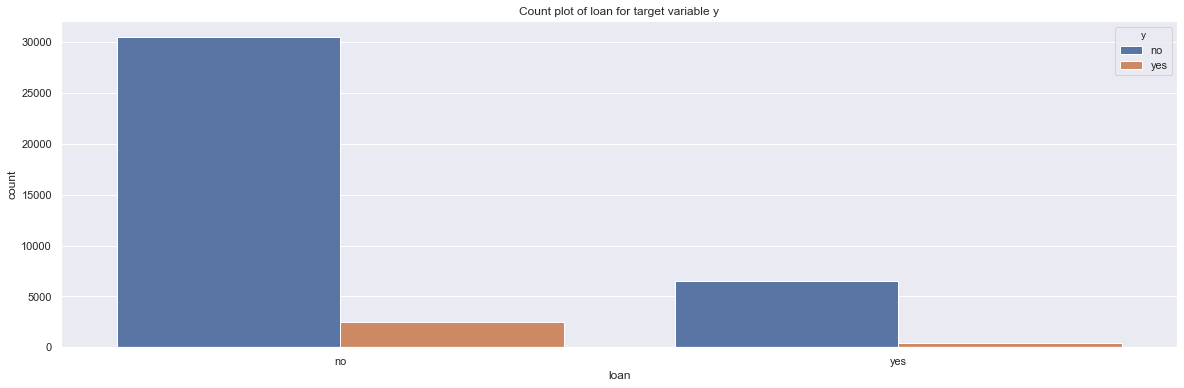

In [55]:
sns.countplot(x=data['loan'], data=data, hue=data['y'])
plt.title('Count plot of loan for target variable y');

**Gözlem**:
- Temerrüt(default) değişkeni için görüldüğü gibi, kredi alan daha az müşteriyle iletişime geçilmiştir.    

## contact

In [56]:
data.contact.value_counts()

cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64

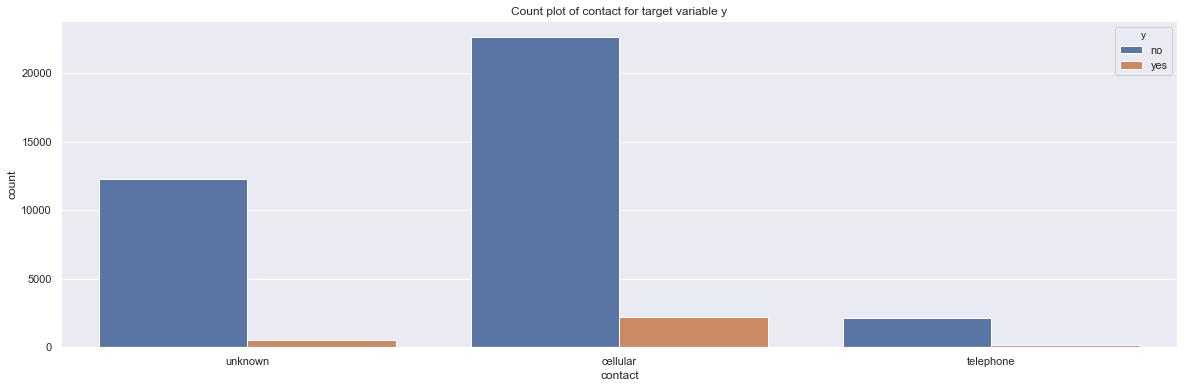

In [57]:
sns.countplot(x=data['contact'], data=data, hue=data['y'])
plt.title('Count plot of contact for target variable y');

**Gözlem**:
- İnsanların çoğu hücresel(cellular) ağ aracılığıyla iletişim kuruyor.

## month

In [58]:
data.month.value_counts()

may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: month, dtype: int64

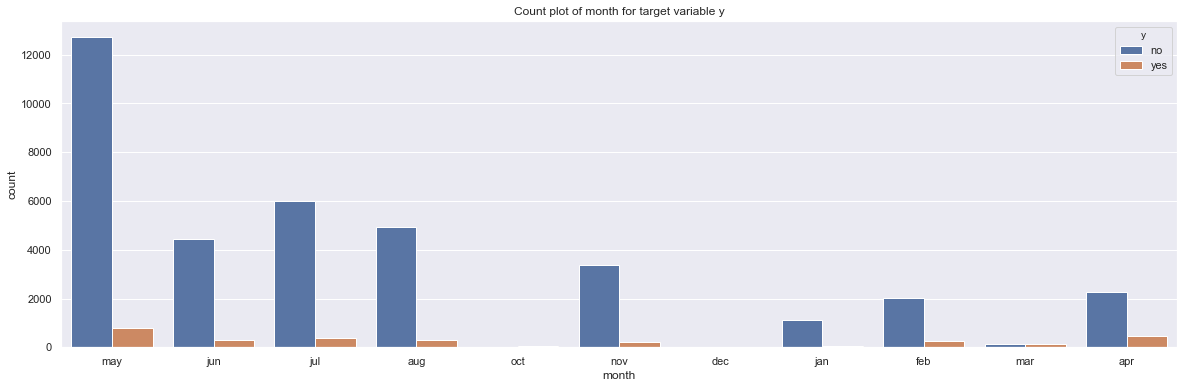

In [59]:
sns.countplot(x=data['month'], data=data, hue=data['y'])
plt.title('Count plot of month for target variable y');

In [61]:
print('Success rate and total clients contacted for different months:')
print('Clients contacted in January: {}, Success rate: {}'.format(len(data[data['month'] == 'jan']), data[data['month'] == 'jan'].y.value_counts()[1]/len(data[data['month'] == 'jan'])))
print('Clients contacted in February: {}, Success rate: {}'.format(len(data[data['month'] == 'feb']), data[data['month'] == 'feb'].y.value_counts()[1]/len(data[data['month'] == 'feb'])))
print('Clients contacted in March: {}, Success rate: {}'.format(len(data[data['month'] == 'mar']), data[data['month'] == 'mar'].y.value_counts()[1]/len(data[data['month'] == 'mar'])))
print('Clients contacted in April: {}, Success rate: {}'.format(len(data[data['month'] == 'apr']), data[data['month'] == 'apr'].y.value_counts()[1]/len(data[data['month'] == 'apr'])))
print('Clients contacted in May: {}, Success rate: {}'.format(len(data[data['month'] == 'may']), data[data['month'] == 'may'].y.value_counts()[1]/len(data[data['month'] == 'may'])))
print('Clients contacted in June: {}, Success rate: {}'.format(len(data[data['month'] == 'jun']), data[data['month'] == 'jun'].y.value_counts()[1]/len(data[data['month'] == 'jun'])))
print('Clients contacted in July: {}, Success rate: {}'.format(len(data[data['month'] == 'jul']), data[data['month'] == 'jul'].y.value_counts()[1]/len(data[data['month'] == 'jul'])))
print('Clients contacted in August: {}, Success rate: {}'.format(len(data[data['month'] == 'aug']), data[data['month'] == 'aug'].y.value_counts()[1]/len(data[data['month'] == 'aug'])))
print('Clients contacted in October: {}, Success rate: {}'.format(len(data[data['month'] == 'oct']), data[data['month'] == 'oct'].y.value_counts()[1]/len(data[data['month'] == 'oct'])))
print('Clients contacted in November: {}, Success rate: {}'.format(len(data[data['month'] == 'nov']), data[data['month'] == 'nov'].y.value_counts()[1]/len(data[data['month'] == 'nov'])))
print('Clients contacted in December: {}, Success rate: {}'.format(len(data[data['month'] == 'dec']), data[data['month'] == 'dec'].y.value_counts()[1]/len(data[data['month'] == 'dec'])))

Success rate and total clients contacted for different months:
Clients contacted in January: 1176, Success rate: 0.03231292517006803
Clients contacted in February: 2296, Success rate: 0.11106271777003485
Clients contacted in March: 258, Success rate: 0.4844961240310077
Clients contacted in April: 2718, Success rate: 0.1659308314937454
Clients contacted in May: 13532, Success rate: 0.05845403488028377
Clients contacted in June: 4734, Success rate: 0.062103929024081114
Clients contacted in July: 6380, Success rate: 0.06018808777429467
Clients contacted in August: 5215, Success rate: 0.055225311601150524
Clients contacted in October: 80, Success rate: 0.3875
Clients contacted in November: 3598, Success rate: 0.061145080600333516
Clients contacted in December: 13, Success rate: 0.07692307692307693


**Gözlem**:
- Müşterilerin çoğuyla Mayıs ayında iletişime geçilmiş ancak başarı oranı sadece % 5,8'dir.
- Mart en yüksek başarı oranına sahiptir.

<a id="reporting"></a>
# 2. Reporting 

- Pazarlama faaliyetlerinin en yüksek olduğu ayın Mayıs ayı olduğunu gördük. Ancak, bu potansiyel müşterilerin vadeli mevduat tekliflerini reddetme eğiliminde olduğu aydı. Bir sonraki pazarlama kampanyası için Şubat, Mart, Nisan ve Ekim ayları düşünülebilir. Aralık ayı, pazarlama faaliyetinin en düşük olduğu ay olduğu için dikkate alınmalıdır, aralık ayının en düşük olmasının bir nedeni olabilir.

- Bankanın bir sonraki pazarlama kampanyası, 20'li veya daha genç ve 60'lı yaşlarındaki potansiyel müşterileri hedeflemelidir. Bir sonraki kampanya için bankanın bu iki kategoriyi ele alması ve daha fazla vadeli mevduat şüphesi olasılığını artırılabilir.

- Öğrenci veya emekli olan potansiyel müşterilerin vadeli mevduata maruz kalma olasılığı en yüksek olanlardı. Emekli bireyler, faiz ödemeleri yoluyla bir miktar nakit elde etmek için daha fazla vadeli mevduata sahip olma eğilimindedir. Öğrenciler, dönemlik mevduatlarını sorgulayan diğer gruptu.

- Görüşmenin süresi, potansiyel bir müşterinin vadeli mevduat açıp açmayacağı ile en olumlu ilişkili olan özellik olduğundan, görüşmeler sırasında potansiyel müşteriler için ilginç bir anket sağlayarak görüşme süresi artabilir. Elbette bu, potansiyel müşterinin vadeli depozitoya tabi olacağı konusunda bize garanti vermez!

- Süresi ortalamanın üzerinde olan hedef grubu hedeflenebilir, bu hedef grubun vadeli mevduat hesabı açma olasılığı yüksektir.